# Notebook to compare thermo on Pt111 from different sources

### Katrin original thermo database:
https://github.com/ReactionMechanismGenerator/RMG-database/blob/dd93410621f62addb5c8390e9498ba4daf40fc1d/input/thermo/libraries/surfaceThermoPt111.py


Katrin's thermo paper
https://pubs.acs.org/doi/full/10.1021/acs.iecr.9b01464

In [1]:
import os
import rmgpy.kinetics
import rmgpy.data.thermo
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_i_thing(thing, thing_list):
    for i in range(len(thing_list)):
        if thing.is_isomorphic(thing_list[i]):
            return i
    return -1

In [3]:
def plot_thermos(thermos, labels=None):
    if type(thermos) != list:
        thermos = [thermos]
    if labels is None:
        labels = ['' for t in thermos]
    linestyles = ['solid', 'dashed', 'dashed', 'dashed']
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 2000, 1001)
#     T = np.linspace(300, 3000, 1001)
    for n, thermo in enumerate(thermos):
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H, linestyle=linestyles[n % len(linestyles)])
        ax[1].plot(T, S, linestyle=linestyles[n % len(linestyles)])
        ax[2].plot(T, Cp, linestyle=linestyles[n % len(linestyles)])
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    ax[2].yaxis.get_major_formatter().set_useOffset(False)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [4]:
def plot_gibbs(thermos, labels=None):
    if type(thermos) != list:
        thermos = [thermos]
    if labels is None:
        labels = ['' for t in thermos]
    linestyles = ['solid', 'dashed', 'dashed', 'dashed']

    T = np.linspace(300, 2000, 1001)
#     T = np.linspace(300, 3000, 1001)
    for n, thermo in enumerate(thermos):
        G = np.zeros(len(T))
        for i in range(0, len(T)):
            G[i] = thermo.get_free_energy(T[i]) / 4184
        plt.plot(T, G, linestyle=linestyles[n % len(linestyles)])
       
    
        # add 3eV bound?
    
    ax = plt.gca()
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('G (kcal / mol)')
    ax.set_title('Gibbs Energy vs. Temperature')
    ax.legend(labels)
   
    ax.yaxis.get_major_formatter().set_useOffset(False)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [5]:
# Load my thermo calculations and a copy of the RMG surfaceThermoPt111 library
thermo_db = rmgpy.data.thermo.ThermoDatabase()
my_thermo_lib = 'pt_libraries'
thermo_db.load_libraries(my_thermo_lib)
print(list(thermo_db.libraries.keys()))

['Pt_fcc111_gemnet', 'Pt_fcc100_gemnet', 'surfaceThermoPt111_20210629', 'surfaceThermoPt111']


## Define the query species

In [6]:
query_species = rmgpy.species.Species().from_adjacency_list("""
1 X  u0 p0 c0 {2,S}
2 H  u0 p0 c0 {1,S}
""")


# query_species = rmgpy.species.Species().from_adjacency_list("""
# 1 X  u0 p0 c0 {2,D}
# 2 O  u0 p2 c0 {1,D}
# """)

# query_species = rmgpy.species.Species().from_adjacency_list("""
# 1 X  u0 p0 c0 {2,Q}
# 2 C  u0 p0 c0 {1,Q}
# """)

# query_species = rmgpy.species.Species().from_adjacency_list("""
# 1 X  u0 p0 c0 {2,T}
# 2 N  u0 p1 c0 {1,T}
# """)

## Plot the results from each library

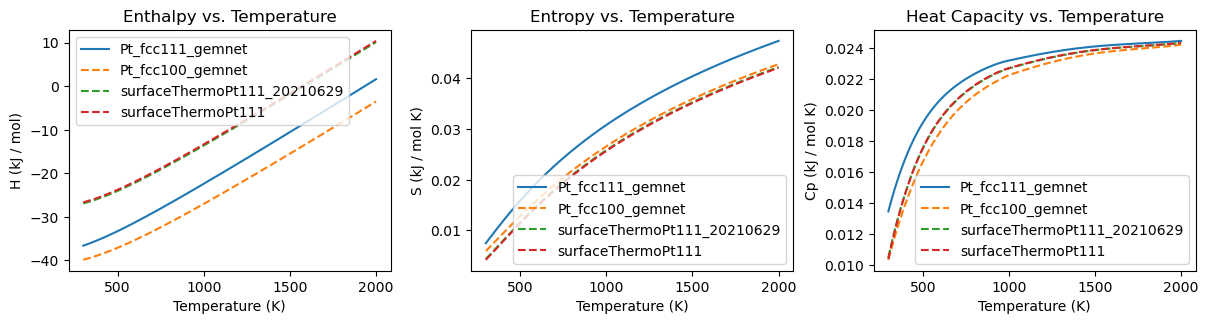

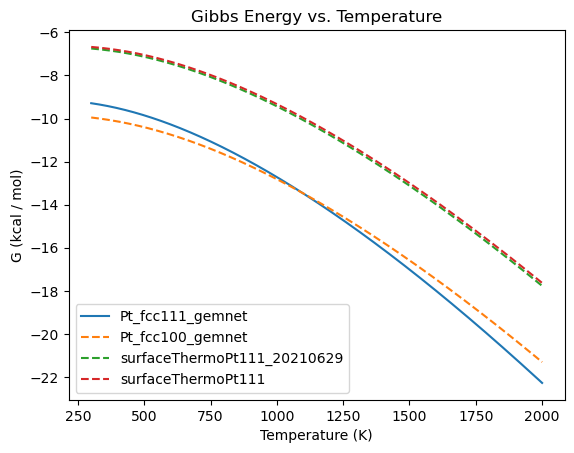

In [8]:
thermos = []
names = []



# get an answer from linear scaling
# metal = 'Pt111'
# linear_scaling_results = thermo_db.get_thermo_data(query_species, training_set=True, metal_to_scale_to=metal)
# if linear_scaling_results:
#     names.append('linear scaling')
#     thermos.append(linear_scaling_results)


for lib in thermo_db.libraries:
    
    results = thermo_db.get_thermo_data_from_library(query_species, thermo_db.libraries[lib])
    if results is None:
        print(f'No results in {lib}')
        continue
        
    names.append(lib)
    thermos.append(results[0])
    
plot_thermos(thermos, names)
plot_gibbs(thermos, names)